In [21]:
import xarray as xr
lr = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/02_Original_Climate_Data/ERA5/Hourly/2m_temperature/ERA5_2m_temperature_1981.nc")
lr

<xarray.Dataset> Size: 251MB
Dimensions:    (longitude: 73, latitude: 49, time: 8760)
Coordinates:
  * longitude  (longitude) float32 292B 2.0 2.25 2.5 2.75 ... 19.5 19.75 20.0
  * latitude   (latitude) float32 196B 52.0 51.75 51.5 51.25 ... 40.5 40.25 40.0
  * time       (time) datetime64[ns] 70kB 1981-01-01 ... 1981-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float64 251MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-08 08:57:10 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

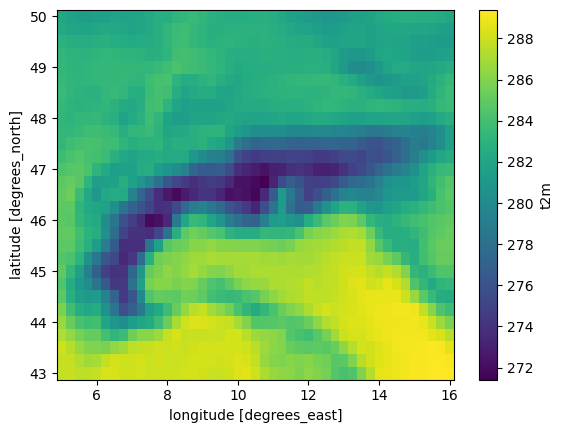

In [35]:
resampled_lr = lr.median(dim='time')
resampled_lr = resampled_lr.sel(latitude=slice(50, 43), longitude=slice(5, 16))
resampled_lr.t2m.plot()
plt.savefig('median_temperature_plot.png')


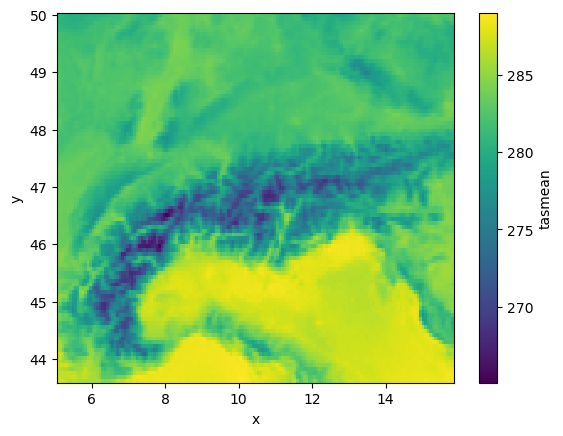

In [36]:
import matplotlib.pyplot as plt

dem = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2_0mm_dem_sa_doy.nc")
resampled_dem = dem.median(dim='time')
resampled_dem.tasmean.plot()
plt.savefig('median_temperature_hr.png')


In [29]:
dem

<xarray.Dataset> Size: 26MB
Dimensions:  (time: 212, y: 96, x: 161)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2016-01-02 2016-01-03 ... 2016-07-31
  * y        (y) float64 768B 43.62 43.69 43.75 43.82 ... 49.8 49.86 49.93 50.0
  * x        (x) float64 1kB 5.084 5.151 5.218 5.285 ... 15.62 15.69 15.76 15.82
Data variables:
    tasmean  (time, y, x) float64 26MB ...